# DATA WRANGLING

## Step 1

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

## Step 2

In [5]:
# Loading the Dataset and rounding numbers to 2 decimal places
dropouts = pd.read_csv('data.csv', delimiter=';')
school_rd = dropouts.drop('Target',axis=1).round(2)
dropouts_concat = pd.concat([school_rd,dropouts['Target']],axis=1)
school = dropouts_concat.copy()
school.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [6]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
school.rename(columns={'Nacionality' :'Nationality', 'Daytime/evening attendance\t':'Daytime/evening attendance'},inplace=True)

In [8]:
# Checking the number of rows and columns
school.shape

(4424, 37)

In [9]:
# Checking the datatypes
print(school.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
school.iloc[:,:18].describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,10.96,11.03,126.98,0.55,0.01,0.11,0.88,0.35
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,26.42,25.26,14.48,0.50,0.11,0.32,0.32,0.48
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,0.00,0.00,95.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,4.00,4.00,117.90,0.00,0.00,0.00,1.00,0.00
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,5.00,7.00,126.10,1.00,0.00,0.00,1.00,0.00
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,9.00,9.00,134.80,1.00,0.00,0.00,1.00,1.00
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,194.00,195.00,190.00,1.00,1.00,1.00,1.00,1.00


In [11]:
school['Curricular units 1st sem (evaluations)'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36,
       45], dtype=int64)

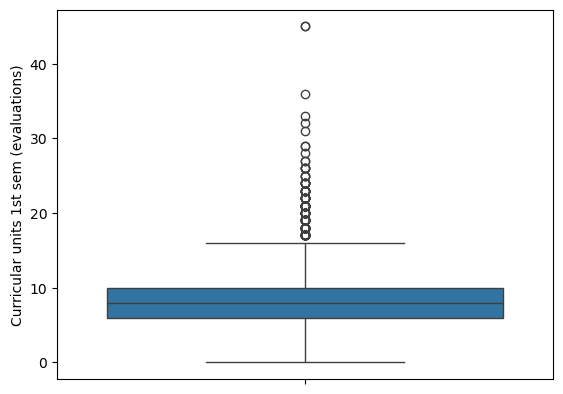

In [12]:
sns.boxplot(school['Curricular units 1st sem (evaluations)'])
plt.show()

In [13]:
school.loc[school['Application order']==9,'Application order' ]=7
school['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 7, 0], dtype=int64)

In [14]:
school.iloc[:,18:].describe().round(2)

,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,0.25,23.27,0.02,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.43,7.59,0.16,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,0.00,19.00,0.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,0.00,20.00,0.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,0.00,25.00,0.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,1.00,70.00,1.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [15]:
# Checking for missing values
print(school.isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [16]:
# Checking for duplicted rows
school.duplicated().sum()

0

In [17]:
school['Marital status'].sort_values().unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [18]:
school['Application mode'].sort_values().unique()

array([ 1,  2,  5,  7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53,
       57], dtype=int64)

In [19]:
school["Previous qualification"].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [20]:
school['Tuition fees up to date'].unique()

array([1, 0], dtype=int64)

## Step 3

In [22]:
# Encoding the Categorical variables and the imbalanced ones
encode_variables = school[['Marital status','Displaced','Application mode','Application order','Previous qualification','Nationality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'International','Scholarship holder','Gender','Tuition fees up to date','Debtor','Educational special needs',"Daytime/evening attendance",'Target','Course','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]
for variable in encode_variables:
    school[f'{variable}'] = encoder.fit_transform(school[f'{variable}'])

for variable in encode_variables:
    school[f'{variable}'] = school[f'{variable}'].astype(str)


In [23]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

In [24]:
# Verifying the encoded column
school["Gender"].sort_values().unique()

array(['0', '1'], dtype=object)

In [75]:
school.select_dtypes(include=['object']).describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,...,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,...,23,435,11,19,22,30,20,441,10,3
top,0,0,1,11,1,0,0,0,26,9,...,6,0,0,0,6,8,6,0,0,2
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,...,1171,718,4130,3894,1913,792,965,870,4142,2209


## Step 4

# Numerical Column Nomalizing

In [29]:
#Checking the variance of the numeric variables
numeric_values = school[['Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP']]
numeric_values.var()

Previous qualification (grade)    173.932093
Admission grade                   209.728348
Unemployment rate                   7.096099
Inflation rate                      1.911889
GDP                                 5.152607
dtype: float64

In [30]:
numeric_values.var()

Previous qualification (grade)    173.932093
Admission grade                   209.728348
Unemployment rate                   7.096099
Inflation rate                      1.911889
GDP                                 5.152607
dtype: float64

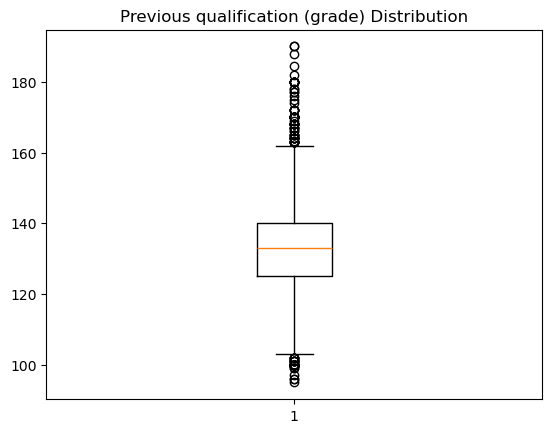

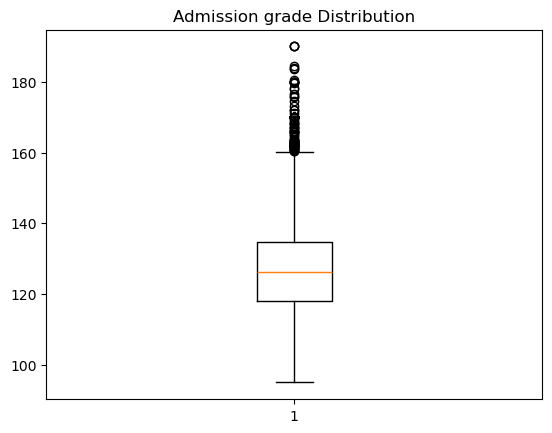

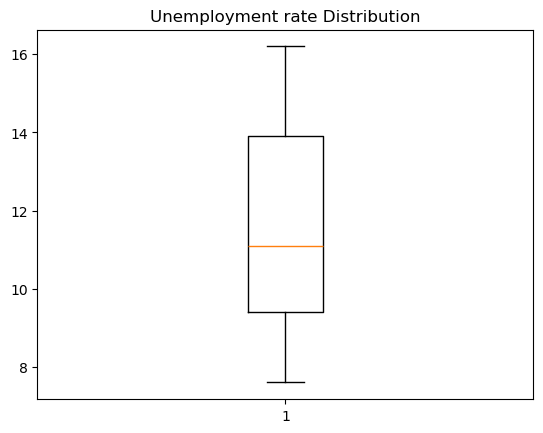

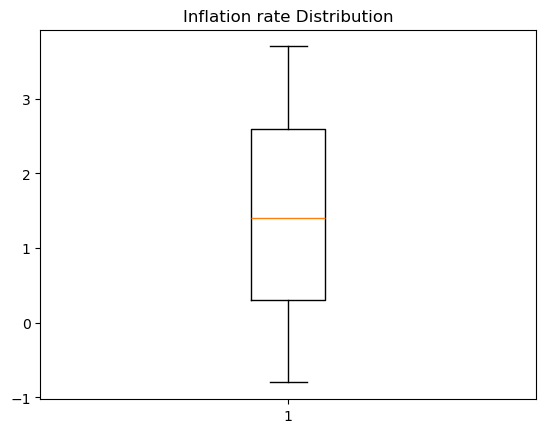

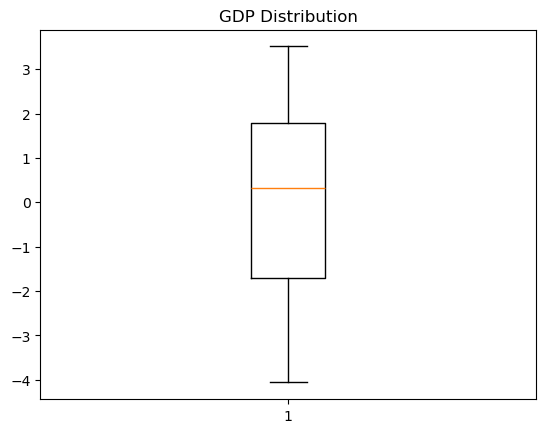

In [31]:
# Checking the distribution of the numeric variables
for numeric in numeric_values:
    plt.boxplot(school[f'{numeric}'])
    plt.title(f'{numeric} Distribution')
    plt.show()

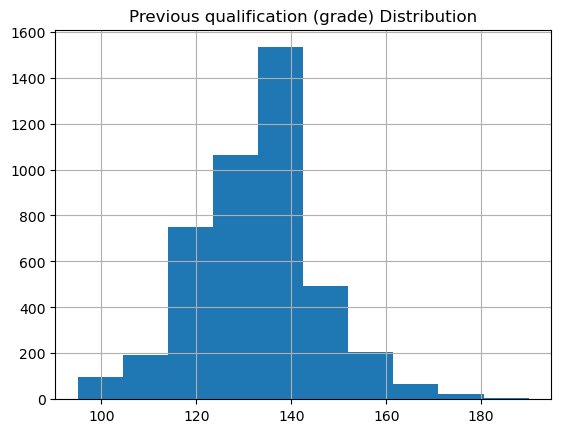

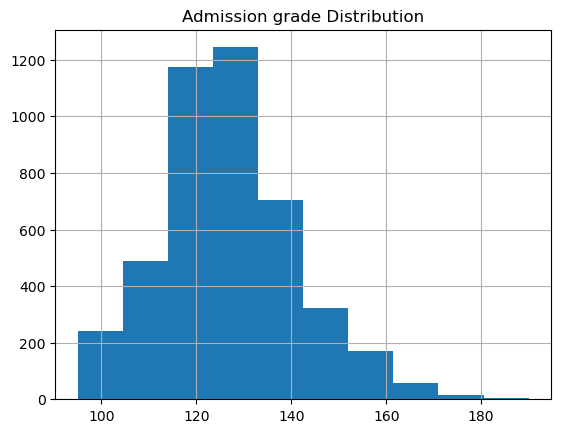

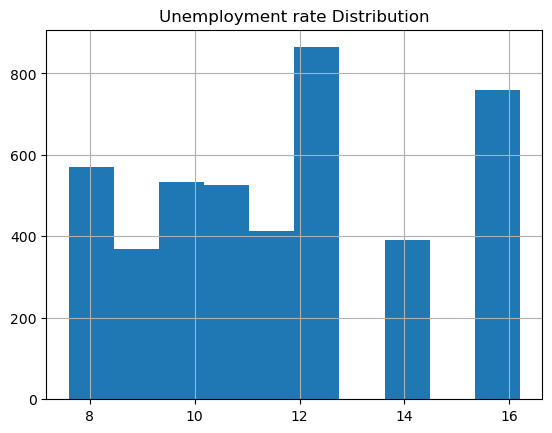

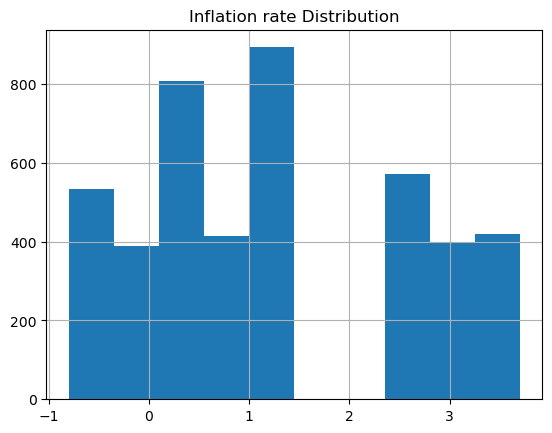

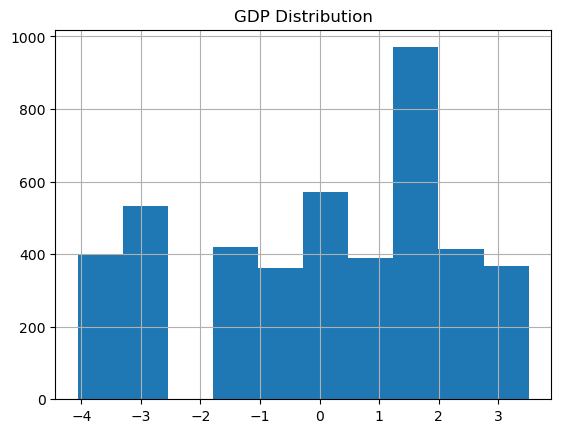

In [32]:
# Checking the distribution of the numeric variables
for numeric in numeric_values:
    school[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [33]:
# Scaling the numeric variables
normalized_values = scaler.fit_transform(numeric_values)
df = pd.DataFrame(normalized_values)
df.columns = numeric_values.columns
df

,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP
0,-0.804841,0.022229,-0.287638,0.124386,0.765761
1,2.076819,1.071926,0.876222,-1.105222,0.347199
2,-0.804841,-0.150419,-0.287638,0.124386,0.765761
3,-0.804841,-0.509526,-0.813253,-1.466871,-1.375511
4,-2.473171,1.002867,0.876222,-1.105222,0.347199
...,...,...,...,...,...
4419,-0.577342,-0.329972,1.476924,1.137005,-1.789667
4420,-0.956508,-0.550961,-0.175007,-0.454253,0.889126
4421,1.621820,1.555339,0.876222,-1.105222,0.347199
4422,3.593483,1.852293,-0.813253,-1.466871,-1.375511


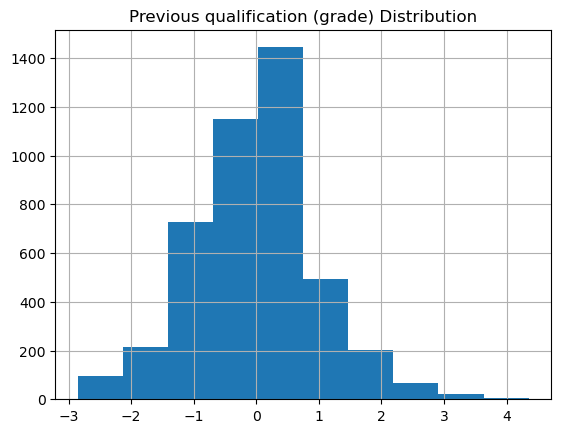

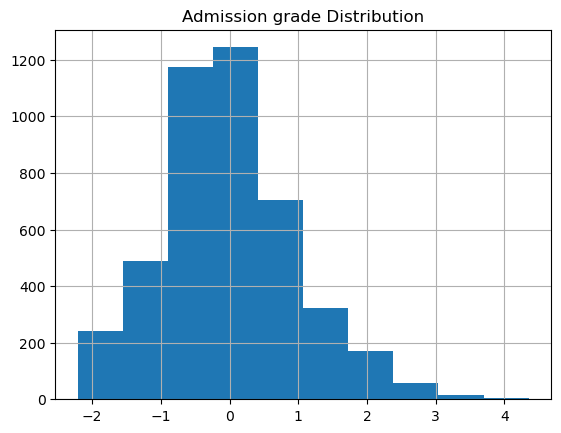

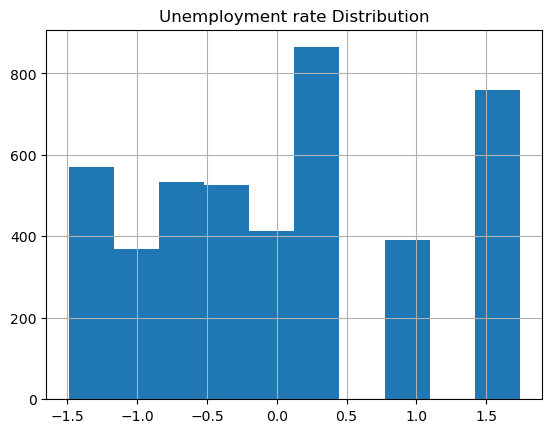

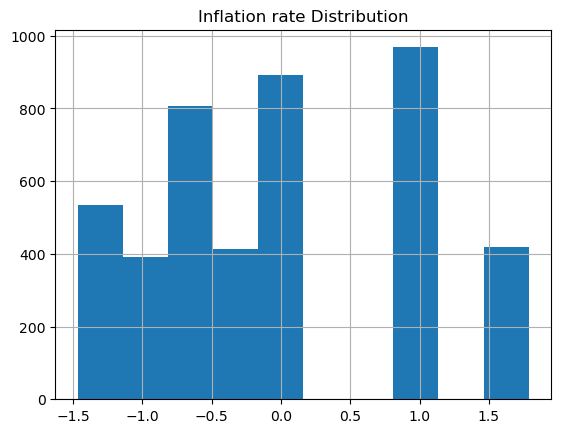

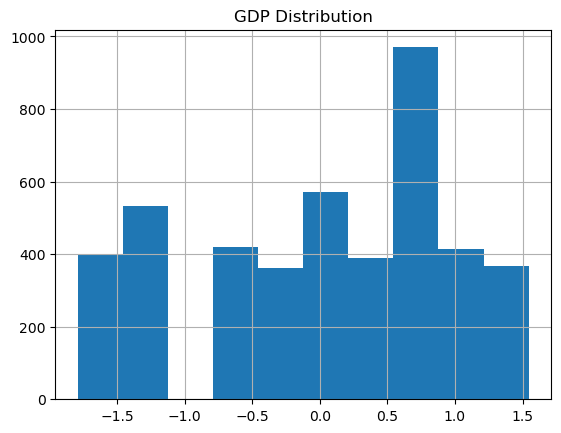

In [34]:
#Checking the scaled distribution
for numeric in df:
    df[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [35]:
df.var()

Previous qualification (grade)    1.000226
Admission grade                   1.000226
Unemployment rate                 1.000226
Inflation rate                    1.000226
GDP                               1.000226
dtype: float64

In [36]:
# Dropping the unscaled variables
for unit in df.columns:
    school.drop(f'{unit}', axis=1, inplace=True)
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   object
 1   Application mode                                4424 non-null   object
 2   Application order                               4424 non-null   object
 3   Course                                          4424 non-null   object
 4   Daytime/evening attendance                      4424 non-null   object
 5   Previous qualification                          4424 non-null   object
 6   Nationality                                     4424 non-null   object
 7   Mother's qualification                          4424 non-null   object
 8   Father's qualification                          4424 non-null   object
 9   Mother's occupation                             4424

In [37]:
# Adding the scaled features
dropout = pd.concat([school,df],axis=1)
dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Nationality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

## Step 5

In [39]:
# Converting the cleaned data to csv format
dropout.to_csv('cleaned_data.csv',index=False)